In [1]:
#Import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as st

In [2]:
#Import data
df = pd.read_csv('E-mailDatabase.csv')
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [3]:
#Create dummy variables
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno_y
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [4]:
#Descriptive statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make,yesno_y
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553,0.394045
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358,0.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000,1.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000,1.000000


<Axes: >

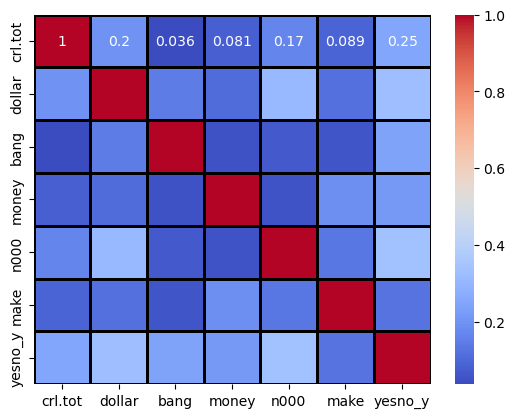

In [5]:
#Data correlation
sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor='black', cmap='coolwarm')

In [6]:
#Assign values
y = df['yesno_y']
x = df.drop(columns='yesno_y')
x = st.add_constant(x)

In [7]:
#Training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1502)

In [8]:
#Logistics regression
model = st.Logit(y_train, x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.451304
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                yesno_y   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3673
Method:                           MLE   Df Model:                            6
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.3275
Time:                        21:56:05   Log-Likelihood:                -1660.8
converged:                       True   LL-Null:                       -2469.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6443      0.059    -27.977      0.000      -1.760      -1.529
crl.tot        0.0006      0.

In [9]:
#logistics coefficient reader
def logistics_reader(coef):
    probability = round((np.exp(coef)-1)*100,2)
    if probability > 0:
        print('The likelihood increases by', probability, '%')
    elif probability == 0:
        print('No impact')
    else:
        print('The likelihood decreases by', abs(probability), '%')

In [10]:
logistics_reader(1.4826)

The likelihood increases by 340.44 %


In [11]:
#Predictions
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>0.5, 1, 0)

In [12]:
#Model assessment
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       563
           1       0.88      0.66      0.75       358

    accuracy                           0.83       921
   macro avg       0.85      0.80      0.81       921
weighted avg       0.84      0.83      0.83       921

